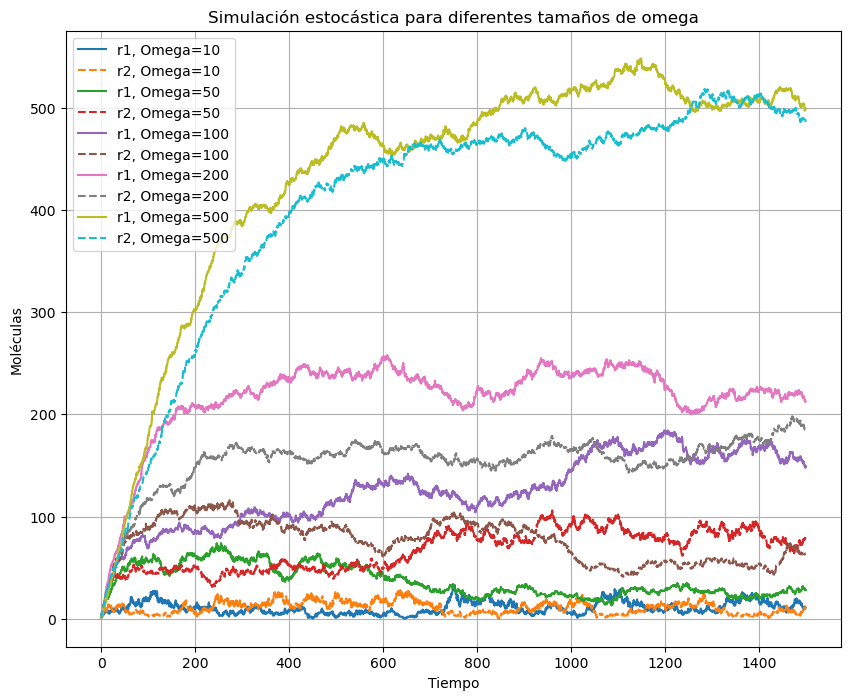

In [3]:
# Importamos librerias necesarias
import numpy as np
import matplotlib.pyplot as plt

# Inicializamos los parametros
alpha = 2
beta = 1
K_R = 1
n = 2
valores_omega = [10, 50, 100, 200,500]  # Tamaño del sistema (la simulación se realizará para cada tamaño)
t_max = 1500  # Tiempo máximo de simulación
dt = 0.01  # Incremento en el tiempo para cada paso

# Definimos la función g_R(x)
def g_R(x, K_R, n):
    return 1 / (1 + (x / K_R)**n)

# Creamos la simulación en base al método de Gillespie
def gillespie(Omega, alpha, beta, K_R, n, t_max, dt):
    r1, r2 = [1], [1]  # Condiciones iniciales
    t = [0]  # Tiempo inicial
    
    while t[-1] < t_max:
        # Calculamos tasas de reacción
        v1 = alpha * g_R(r2[-1] / Omega, K_R, n)
        v2 = alpha * g_R(r1[-1] / Omega, K_R, n)
        v3 = beta * r1[-1] / Omega
        v4 = beta * r2[-1] / Omega
        tasas = np.array([v1, v2, v3, v4])
        suma_tasas = np.sum(tasas)
        
        if suma_tasas == 0: # Para el programa si no hay reacciones
            break
        
        # Tiempo hasta la siguiente reacción
        tau = np.random.exponential(1 / suma_tasas)
        
        if t[-1] + tau > t_max: # PAra el programa si el tiempo maximo se excede. Esto para que no continue indefinidamente
            break
        
        t.append(t[-1] + tau) # Actualiza el almacenamiento de los datos del tiempo
        
        # Determinar qué reacción ocurre
        r = np.random.rand() * suma_tasas
        if r < v1:
            r1.append(r1[-1] + 1)  # Reacción 1 (síntesis de r1)
            r2.append(r2[-1])
        elif r < v1 + v2:
            r2.append(r2[-1] + 1)  # Reacción 2 (síntesis de r2)
            r1.append(r1[-1])
        elif r < v1 + v2 + v3:
            r1.append(r1[-1] - 1)  # Reacción 3 (degradación de r1)
            r2.append(r2[-1])
        else:
            r2.append(r2[-1] - 1)  # Reacción 4 (degradación de r2)
            r1.append(r1[-1])
    
    return t, r1, r2

# Graficamos simulaciones para diferentes tamaños del sistema Omega
plt.figure(figsize=(10, 8)) # Definimos el tamaño de la figura/imagen

# Creamos un bucle para graficar cada valor de omega
for Omega in valores_omega:
    t, r1, r2 = gillespie(Omega, alpha, beta, K_R, n, t_max, dt)
    plt.plot(t, r1, label=f'r1, Omega={Omega}')
    plt.plot(t, r2, label=f'r2, Omega={Omega}', linestyle='--')

plt.xlabel('Tiempo')
plt.ylabel('Moléculas')
plt.title('Simulación estocástica para diferentes tamaños de omega')
plt.legend()
plt.grid(True)
plt.savefig('grafico_seno.png', dpi=300, bbox_inches='tight')
plt.show()